## Comparison example

Test the accuracy of BINS by comparing to exact solution to Taylor-Green vortex

In [ ]:
# Reset all information
%reset -f

# Import necessary modules
import numpy as np
from scipy.io import loadmat

In [ ]:
# Mount the google drive
# This will ask you to login and enter an authentication code
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Move to the directory of interest
# Note here to change the path. It is possible "/content/drive/MyDrive/Colab Notebooks"
# will remain the same if you are running this from Google colab in default
# Rest of the path will depend on how your local folders (in Google drive) are structured
mydrive = "/content/drive/MyDrive/200A/Project_Dec5"
!ls $mydrive

advection.py	    compTest.ipynb  plotScaTrans.py  sca_trans.py
benchmark.py	    correct.py	    plotSoln.py      start_here.ipynb
BINS.py		    diffusionB.py   poissonSolve.py  temperature.py
building.ipynb	    fillBC.py	    predict.py	     utils.py
check_masscons.py   IC.py	    pressure.py
check_stability.py  make_matrix.py  __pycache__


In [ ]:
# Add to system path so that you can directly invoke commands
import sys
sys.path.append( mydrive)

In [ ]:
import numpy as np
from BINS import BINS
from utils import np_arange

In [ ]:
# Set the parameters
# N = number of cells in x and y
Nx = 64;
Ny = 64;

# L = physical dimension in x and y
Lx = 2*np.pi;
Ly = 2*np.pi;

# dt = timestep
dt = min((Lx/Nx),(Ly/Ny)) / 10; # dt = timestep -- use for Re = 100,1000
dx = 10*dt

# T = final time
T = 2;

# BC = boundary conditions (4x1 array)
BC = np.array([[complex(0,1),complex(0,1),complex(0,1),complex(0,1)]])

# IC_choice = choice of initial conditions defined in IC.m: Taylor-Green vortex
IC_choice = 3;

# nu = kinematic viscosity
nu = 0.1;

# ng = number of ghostcells
ng = 1;

# misc
PGx = 0 # pressure gradient in x
PGy = 0 # pressure gradient in y
IBM = 0 # IBM 0 = off, 1 = on

In [ ]:
# Call the NS solver
BINS(Nx,Ny,Lx,Ly,dt,T,BC,IC_choice,nu,ng,PGx,PGy,IBM)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Import the saved solution
import scipy
from os import listdir
data = scipy.io.loadmat('BINS_output.mat')
u = data['u']
v = data['v']
p = data['p']
nu = data['nu'][0][0]
Lx = data['Lx'][0][0]
Nx = data['Nx'][0][0]
Ly = data['Ly'][0][0]
Ny = data['Ny'][0][0]
T = data['T'][0][0]

In [ ]:
# Exact solution
dy = dx
uexact = np.copy(u)
vexact = np.copy(v)

# Ghost cell index
li = ng+1 #lower index of inner (non-ghost cell) data
uix = ng+Nx #upper index of inner (non-ghost cell) data
uiy = ng+Ny #upper index of inner (non-ghost cell) data

# For u
xu = np.linspace(0,Lx,Nx+1)
yu = np.linspace(dy/2,Ly-dy/2,Ny)
y,x = np.meshgrid(yu,xu)
uexact[li-1:uix+1,li-1:uiy] = np.multiply(np.sin(x),np.cos(y))

# For v
xv = np.linspace(dx/2,Lx-dx/2,Nx);
yv = np.linspace(0,Ly,Ny+1);
y,x = np.meshgrid(yv,xv)
vexact[li-1:uix,li-1:uiy+1] = np.multiply(-np.cos(x),np.sin(y))

# Decay with time
F = np.exp(-2*nu*T)

# Get the exact solution
uexact = uexact*F
vexact = vexact*F

In [ ]:
# Compare numerical solution to exact solution and plot
# Pick out line y=pi/2 in exact and numerical solutions
y_line = np.pi/2
yIdx = int(np.round((y_line/Ly)*Ny))
u_line = u[li-1:uix+1,yIdx]
v_line = v[li-1:uix,yIdx]
ue_line = uexact[li-1:uiy+1,yIdx] 
ve_line = vexact[li-1:uiy,yIdx]

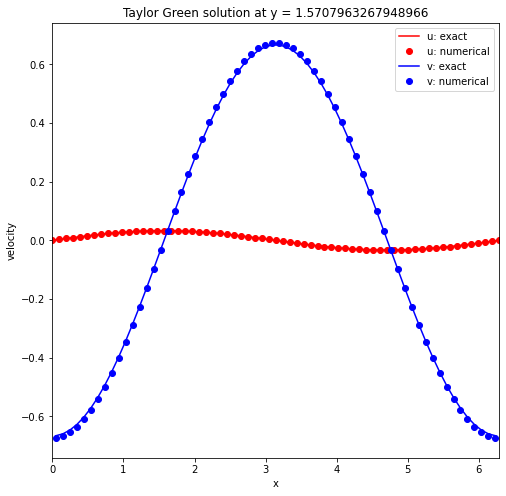

In [ ]:
import matplotlib.pyplot as plt
# Plot
fig, main_ax = plt.subplots()
fig.set_size_inches(8, 8)
main_ax.set_xlabel('x')
main_ax.set_ylabel('velocity')
main_ax.set_title('Taylor Green solution at y = ' + str(y_line))
main_ax.set_xlim(0, L)
main_ax.plot(xu,ue_line,'r-', xu,u_line,'ro')
main_ax.plot(xv,ve_line,'b-', xv,v_line,'bo')
main_ax.legend(['u: exact', 'u: numerical', 'v: exact', 'v: numerical'])